In [2]:
import pandas as pd
from pandas import read_csv

Sensors = pd.read_csv("../data/appa2_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

df = read_csv("../data/ViaBolz.csv",
             sep = ",",
             parse_dates = ["ts"])
df.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df = df.rename(columns=change)
Sensors 

,1/13/2021,4/29/2021,6/30/2021,2/24/2022
channel,,,,
1,LaFeO3,LaFeO3,LaFeO3,LaFeO3
2,LaFeO3,LaFeO3,LaFeO3,CNT
3,WO3,ZnOg,WO3,WO3
4,WO3,ZnOg,ZnOR,ZnOR
5,ZnO,ZnO,ZnOg,SmFeO3
6,ZnO,ZnO,ZnOg,SmFeO3
7,STN,STN,STN,STN
8,STN,STN,STN,STN


In [ ]:
Test = {}
maxim = len(Sensors.columns)
for i,col in enumerate(Sensors.columns):
    materials = []
    if i == maxim-1:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })])
            else:
                Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })    
    else:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })
                                                    ])
            else:
                Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })

                                                     


In [4]:
Test

{'LaFeO31':                                      R     HT     V
 ts                                                 
 2021-01-13 10:13:00+00:00  131072000.0   53.8  0.35
 2021-01-13 10:14:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:15:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:16:00+00:00  131072000.0   55.1  0.36
 2021-01-13 10:17:00+00:00  131072000.0   54.4  0.35
 ...                                ...    ...   ...
 2023-06-26 09:07:00+00:00    1702234.0  112.2  3.36
 2023-06-26 09:08:00+00:00    1702234.0  112.1  3.36
 2023-06-26 09:09:00+00:00    1680410.0  112.2  3.36
 2023-06-26 09:10:00+00:00    1680410.0  112.1  3.36
 2023-06-26 09:12:00+00:00    1702234.0  112.3  3.36
 
 [1179074 rows x 3 columns],
 'LaFeO32':                                      R     HT      V
 ts                                                  
 2021-01-13 10:13:00+00:00  131072000.0  56.50  0.350
 2021-01-13 10:14:00+00:00  131072000.0  55.00  0.350
 2021-01-13 10:15:00+00:00  131072000.0  5

In [5]:
import matplotlib.pyplot as plt

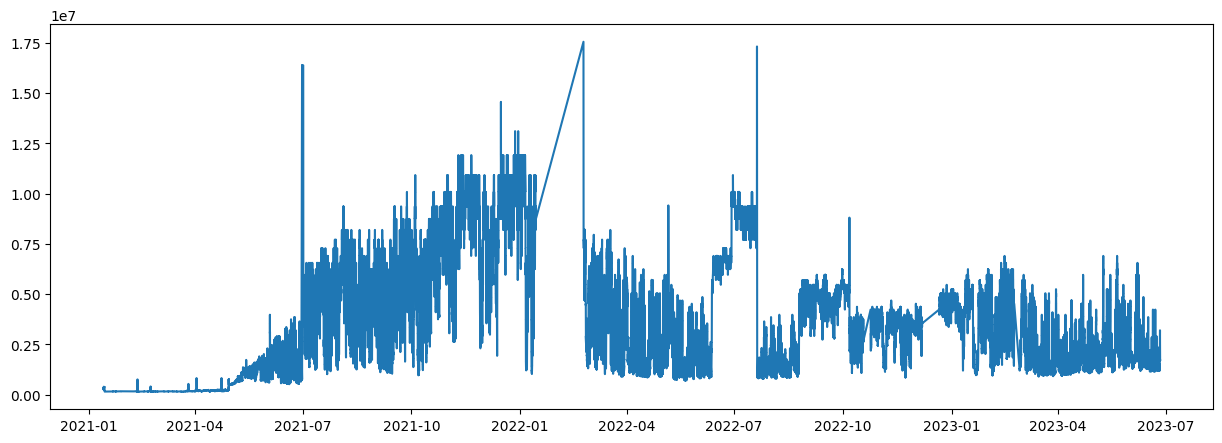

In [6]:
df1 = Test["LaFeO31"]

df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df1.index, df1.R)
plt.show()

In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
counter = 1
runningSumList = []
weightedSum = 0
df1_DAMP = df1
for R in df1_DAMP.R:
    runningSumList.append(R)
    counter += 1
    if counter > 20:
        del runningSumList[0]
        for i in range (0, 19):
            weightedSum += weightedSum + runningSumList[i]
        weightedAverage = weightedSum / 20
        if abs(R - weightedAverage) > 1000:
            df1_DAMP[counter - 1] = weightedAverage
        weightedSum = 0
        #print("This is the weighted average: " + str(weightedAverage))
    if counter > 200:
         break


/tmp/ipykernel_20281/1370763524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_DAMP[counter - 1] = weightedAverage
/tmp/ipykernel_20281/1370763524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_DAMP[counter - 1] = weightedAverage
/tmp/ipykernel_20281/1370763524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

: 

: 

In [ ]:
df1_DAMP = df1_DAMP.loc[df1_DAMP.R < 0.18e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df1_DAMP.index, df1_DAMP.R)
plt.show()

# Sensore 2

In [ ]:
df2 = Test["LaFeO32"]

df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df2.index, df2.R)
plt.plot()

# Sensore 3

In [ ]:
df3 = Test["WO31"]
""" Maybe very bad sensor??? Always saturating or breaking??? """
# df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df3.index, df3.R)
plt.show()

# Sensore 4

In [ ]:
df4 = Test["WO32"]
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df4.index, df4.R)
plt.show()

# Sensore 5

In [ ]:
df5 = Test["ZnO1"]
"Bad sensor?? Saturation always occurs after half 03/2021"
# df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df5.index, df5.R)
plt.show()

# Sensore 6

In [ ]:
df6 = Test["ZnO2"]

"""Reaches saturation after 06/2021"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df6 = df6.loc[df6.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df6.index, df6.R)
plt.show()

# Sensore 7

In [ ]:
df7 = Test["STN1"]

""" Surely a very bad sensor, saturated during almost for all the time"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df7 = df7.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df7.index, df7.R)
plt.show()

# Sensore 8

In [ ]:
df8 = Test["STN2"]

""" Also a very bad sensor, always saturated after 04/2021 """
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df8 = df8.loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df8.index, df8.R)
plt.show()

# Sensore 9

In [ ]:
df9 = Test["ZnOg1"]

""" Very Bad one, almost no good data"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df9 = df9.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df9.index, df9.R)
plt.show()

# Sensore 10
Heater rotto, solo una parte funzionante

In [ ]:
df10 = Test["ZnOg2"]


# Pulisco le saturazioni o altri errori causati dal sensore : 
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))
plt.plot(df10.index, df10.HT)
plt.show()

In [ ]:
df11 = Test["ZnOR1"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df11 = df11.loc[df11.HT < 1000]
fig = plt.figure(figsize=(15,5))
plt.plot(df11.index, df11.HT)
plt.show()

In [ ]:
df12 = Test["CNT1"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(20,5))
plt.plot(df12.index, df12.HT)
plt.show()

In [ ]:
df13 = Test["SmFeO31"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(20,5))
plt.plot(df13.index, df13.HT)
plt.show()

In [ ]:
df14 = Test['SmFeO32']

# Pulisco le saturazioni o altri errori causati dal sensore : 
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(20,5))
plt.plot(df14.index, df14.HT)
plt.show()
